# Topological Quantum Error Correction ( TQEC ) : Topological automation

## Setup the basic tools for TQEC

### Simple things to build QEC code with given packages ( can be changed )
- Numpy
- Stim

In [1]:
import numpy as np
import stim

# Create TQEC class 

It takes a tool package ( ex. stim ) and creates an operator set for TQEC platform

In [2]:
# TQEC class
class TQEC:
    
    # Creating quantum circuit 
    # Make memories lists for tracking activated & deactivated qubits
    def __init__( self, pakage_name = stim):
        self.custom_name = pakage_name
        self.circuit = self.custom_name.Circuit()
        
        self.structure_qubits = [ ]
        self.activated_qubits = [ ]
        self.deactivated_qubits = [ ]
    
    # Apply physical qubits into the circuits and give an index for each qubits
    def physical_qubits( self, total_qubit_num ):
        self.structure_qubits = np.arange( total_qubit_num )
        for num in self.structure_qubits:
            self.circuit.append_operation( "QUBIT_COORDS",[ num ] )
    
    # Implementing two qubit gates requires certain qubit ordering [ control1, target1, control2, target2, ... ]
    def merging_lists( self, first_qubit_list, second_qubit_list ):
        return [sub[item] for item in range(len(second_qubit_list))
                        for sub in [first_qubit_list, second_qubit_list]]
    
    ## Whenever we apply quantum gates in the circuit, we update activated & deactivated qubits 
    
    # Implementing cnot gate between given control qubit list and target qubit list
    def cnot( self, control_qubits, target_qubits ):
        self.activated_qubits = list( set(control_qubits).union( target_qubits ) )
        return self.circuit.append_operation( "CNOT", self.merging_lists( control_qubits, target_qubits ) )
    
    # Implementing cz gate between given control qubit list and target qubit list
    def cz( self, control_qubits, target_qubits ):
        self.activated_qubits = list( set(control_qubits).union( target_qubits ) )
        return self.circuit.append_operation( "CZ", self.merging_lists( control_qubits, target_qubits ) )
    
    # Implementing single qubit gate with given gate types ( H, X, Z, ... )
    def single_gate( self, gate_type, activate_qubits ):
        self.activated_qubits = list( set(activate_qubits) )
        return self.circuit.append_operation( gate_type, activate_qubits )

    # Measure qubits 
    def measure( self, activate_qubits ):
        self.activated_qubits = list( set(activate_qubits) )
        return self.circuit.append_operation( "MR", activate_qubits )
    
    ### Errors for quantum error correction code
    def bitflip_err( self, activate_qubits, error_rate ):
        return self.circuit.append_operation( "X_ERROR", activate_qubits, error_rate )
    
    def single_dep_err( self, activate_qubits, error_rate ):
        return self.circuit.append_operation( "DEPOLARIZE1", activate_qubits, error_rate )
    
    def two_dep_err( self, control_qubits, target_qubits, error_rate ):
        return self.circuit.append_operation( "DEPOLARIZE2", self.merging_lists( control_qubits, target_qubits ), error_rate )
    
    def idling_err( self, error_rate ):
        return self.circuit.append_operation( "DEPOLARIZE1", list( set(self.structure_qubits) - set( self.activated_qubits ) ), error_rate )

In [5]:
if __name__ == "__main__":
    # Create Bell state
    bell_circuit = TQEC()
    circuit = bell_circuit.circuit
    bell_circuit.physical_qubits(2)
    bell_circuit.single_gate("H",[0])
    bell_circuit.cnot([0],[1])
    print(circuit)

QUBIT_COORDS 0
QUBIT_COORDS 1
H 0
CX 0 1


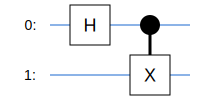

In [7]:
if __name__ == "__main__":
    import stimcirq
    from cirq.contrib.svg import SVGCircuit

    cirq_circuit = stimcirq.stim_circuit_to_cirq_circuit(circuit)
# SVGCircuit(cirq_circuit)